# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import norm

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


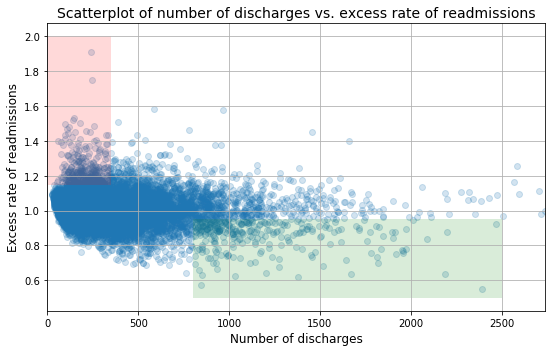

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
# Your turn

In [5]:
hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [6]:
hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', \
                  'Expected Readmission Rate']].head()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
0,242,1.9095,10.8,5.6
1,247,1.7521,9.2,5.3
2,586,1.5836,7.6,4.8
3,965,1.5760,9.0,5.7
4,149,1.5308,8.2,5.4


# A. Initial observations based on the plot above

In [7]:
print('Overall, rate of readmissions is trending down with increasing number of discharges')
print('\nWith lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)')
print('\nWith higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)')

# coerce 'discharges' variable to numeric

hospital_read_df['Number of Discharges'] = hospital_read_df['Number of Discharges'].apply(pd.to_numeric, errors='coerce')

# facet discharges by 500

hospital_read_df['Discharge Group'] = [1 if i < 500 else \
                                      2 if i < 1000 else \
                                      3 if i < 1500 else \
                                      4 if i < 2000 else \
                                      5 if i < 2500 else \
                                      6 for i in hospital_read_df['Number of Discharges']]

# aggregate the mean, median, and count by discharge group

mean_by_dis_group = hospital_read_df.groupby('Discharge Group')['Excess Readmission Ratio'].mean()
median_by_dis_group = hospital_read_df.groupby('Discharge Group')['Excess Readmission Ratio'].median()
count_by_dis_group = hospital_read_df.groupby('Discharge Group')['Excess Readmission Ratio'].count()

print('\nWe coerce \'discharges\' to a numeric variable, and facet by 500 (that is, less than 500, less than 1000, etc.)\n')

print(pd.DataFrame({'Mean': mean_by_dis_group.values, 'Median': median_by_dis_group.values, 'Count': \
                   count_by_dis_group.values}, index=['500', '1000', '1500', '2000', '2500', 'Max']))

print('\nThe excess readmission ratio is generally, but not monotonically, trending downward as the number of discharges \
increases')

# excess readmission % faceted by # of discharges

readmit_pct_by_dis_group = hospital_read_df[hospital_read_df['Excess Readmission Ratio'] > 1].groupby('Discharge Group') \
['Excess Readmission Ratio'].count() / hospital_read_df.groupby('Discharge Group')['Excess Readmission Ratio'].count()

print('\n', pd.DataFrame({'Excess Readmit Ratio': readmit_pct_by_dis_group.values}, index=['500', '1000', '1500', '2000', \
                                                                                     '2500', 'Max']))

print('\nWhile the mean and median weakly trend downward, the excess readmission ratio, when greater than one, \
considerably declines as the number of discharges increases')

Overall, rate of readmissions is trending down with increasing number of discharges

With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

We coerce 'discharges' to a numeric variable, and facet by 500 (that is, less than 500, less than 1000, etc.)

          Mean  Median  Count
500   1.011131  1.0049   8883
1000  0.998812  0.9990   2150
1500  0.983503  0.9884    343
2000  0.954213  0.9691     89
2500  0.977300  0.9887     22
Max   0.977436  0.9746   2244

The excess readmission ratio is generally, but not monotonically, trending downward as the number of discharges increases

       Excess Readmit Ratio
500               0.525386
1000              0.495814
1500              0.460641
2000              0.359551
2500              0.454545
Max               0.323529

While the mean and median weakly trend downward, the

#############################################################################################################
#############################################################################################################
#############################################################################################################

# B. Statistics

In [8]:
#In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 
#63% have excess readmission rate greater than 1

#verify

B_a_mean = hospital_read_df[hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'].mean()

B_a_count1 = hospital_read_df[(hospital_read_df['Number of Discharges'] < 100) & (hospital_read_df['Excess Readmission Ratio'] \
                                                                                  > 1)]['Excess Readmission Ratio'].count()

B_a_count2 = hospital_read_df[hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'].count()

print('We verify that for hospitals with less than 100 discharges, the mean excess readmission rate is {0:.3f} and {1:.0f}% \
have excess readmission rate greater than 1'.format(B_a_mean, B_a_count1 / B_a_count2 * 100))

We verify that for hospitals with less than 100 discharges, the mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1


In [9]:
#In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 
#44% have excess readmission rate greater than 1

#verify

B_b_mean = hospital_read_df[hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'].mean()

B_b_count1 = hospital_read_df[(hospital_read_df['Number of Discharges'] > 1000) & (hospital_read_df\
                                                                                   ['Excess Readmission Ratio'] > 1)]\
      ['Excess Readmission Ratio'].count()

B_b_count2 = hospital_read_df[hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'].count()

print('We verify that for hospitals with greater than 1000 discharges, the mean excess readmission rate is {0:.3f} and \
{1:.0f}% have excess readmission rate greater than 1'.format(B_b_mean, B_b_count1 / B_b_count2 * 100))

We verify that for hospitals with greater than 1000 discharges, the mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


#############################################################################################################
#############################################################################################################
#############################################################################################################

# C. Conclusions

In [10]:
print('There is a significant correlation between hospital capacity (number of discharges) and readmission rates.')
print('\nSmaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications \
that lead to readmissions.')
print('\nWe compute the correlation and the t-test of its significance across (i) all observations, (ii) discharges \
greater than 300, and (iii) discharges less than 300.')


########## all observations

all_rho = hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].corr().iloc[0,1]

all_count = hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].shape[0]

all_rho_t = all_rho * np.sqrt(all_count - 2) / np.sqrt(1 - all_rho ** 2)


########## discharges greater than 300

g_300_rho = hospital_read_df[hospital_read_df['Number of Discharges'] > 300][['Number of Discharges', \
                                                                              'Excess Readmission Ratio']].corr().iloc[0,1]

g_300_count = hospital_read_df[hospital_read_df['Number of Discharges'] > 300][['Number of Discharges', \
                                                                                'Excess Readmission Ratio']].shape[0]

g_300_t = g_300_rho * np.sqrt(g_300_count - 2) / np.sqrt(1 - g_300_rho ** 2)


########## discharges less than 300

l_300_rho = hospital_read_df[hospital_read_df['Number of Discharges'] < 300][['Number of Discharges', \
                                                                              'Excess Readmission Ratio']].corr().iloc[0,1]
l_300_count = hospital_read_df[hospital_read_df['Number of Discharges'] < 300][['Number of Discharges', \
                                                                                'Excess Readmission Ratio']].shape[0]
l_300_t = l_300_rho * np.sqrt(l_300_count - 2) / np.sqrt(1 - l_300_rho ** 2)

print('\nCorrelations and t-stats:\nall observations: {0:.2f}, {1:.2f}\ndischarges greater than 300: {2:.2f}, {3:.2f} \
\ndischarges less than 300: {4:.2f}, {5:.2f}'.format(all_rho, all_rho_t, g_300_rho, g_300_t, l_300_rho, l_300_t))

print('\nAlthough the correlations may not appear significantly different from zero, the t-tests do indicate \
statistical significance.\nIt should be noted that testing the significance of rho can be influenced greatly by the \
number of observations -- even a rho that is ostensibly insignificant can generate a high t-stat if the number of \
observations is large.\nIndustry knowledge serves as the best guide to dictate whether the observed correlations are \
of importance.')

There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

We compute the correlation and the t-test of its significance across (i) all observations, (ii) discharges greater than 300, and (iii) discharges less than 300.

Correlations and t-stats:
all observations: -0.10, -12.71
discharges greater than 300: -0.07, -5.50 
discharges less than 300: -0.04, -2.87

Although the correlations may not appear significantly different from zero, the t-tests do indicate statistical significance.
It should be noted that testing the significance of rho can be influenced greatly by the number of observations -- even a rho that is ostensibly insignificant can generate a high t-stat if the number of observations is large.
Industry knowledge serves as the best guide to dictate whether the observed correlations are of 

#############################################################################################################
#############################################################################################################
#############################################################################################################

# D. Regulatory policy recommendations

In [11]:
print('Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for \
quality care to continue operation.')

print('\nDirectives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number \
of them with higher capacity and number of discharges.')

print('\nWe test whether hospitals with smaller capacity differ in the quality of care from hospitals with larger capacity, \
and to do so we exploit the difference in proportions test.')

print('\nThe null hypothesis is that there is no difference between hospitals with less than 300 discharges and hospitals \
with discharges greater than 300 for hospitals with an excess readmission ratio greater than 1, and the alternative \
hypothesis is that the proportion for hospitals with less than 300 is greater than for hospitals with more than 300.')

p_l_300 = hospital_read_df[(hospital_read_df['Number of Discharges'] < 300) & (hospital_read_df['Excess Readmission Ratio'] \
                                                                               > 1)] \
['Number of Discharges'].count() / hospital_read_df[hospital_read_df['Number of Discharges'] < 300] \
['Number of Discharges'].count()

p_g_300 = hospital_read_df[(hospital_read_df['Number of Discharges'] >= 300) & (hospital_read_df['Excess Readmission Ratio'] \
                                                                                > 1)] \
['Number of Discharges'].count() / hospital_read_df[hospital_read_df['Number of Discharges'] >= 300] \
['Number of Discharges'].count()

n_l_300 = hospital_read_df[hospital_read_df['Number of Discharges'] < 300]['Number of Discharges'].count()

n_g_300 = hospital_read_df[hospital_read_df['Number of Discharges'] >= 300]['Number of Discharges'].count()

pooled_p = (p_l_300 * n_l_300 + p_g_300 * n_g_300) / (n_l_300 + n_g_300)

SE = np.sqrt(pooled_p * (1 - pooled_p) * (1 / n_l_300 + 1 / n_g_300))

Z_300 = (p_l_300 - p_g_300) / SE

p_value_300 = 1 - norm.cdf(Z_300)

print('\nThe p-value of {0:.6f} is significantly below 0.01, which indicates that hospitals with less than 300 discharges \
witness an excess readmission ratio greater than 1 more often than do hospitals with greater than 300 discharges.'.\
      format(p_value_300))

print('\nThe practical significance is that a relationship exists between hospitals with fewer discharges and higher \
excess readmission, yet this test is not sufficient to mean that causality exists -- it might be that exogenous factors, \
such as appropriations from government agencies, influence the quality of hospital care, which then affects readmission.')

print('\nDirectives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number \
of them with higher capacity and number of discharges.')

print('\nConsolidating hospitals and facilities may not lead to the economies of scale that larger hospitals inherently \
witness if those consolidated hospoitals are still bereft of the funds that are needed to tend to patients with quality.')

Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

We test whether hospitals with smaller capacity differ in the quality of care from hospitals with larger capacity, and to do so we exploit the difference in proportions test.

The null hypothesis is that there is no difference between hospitals with less than 300 discharges and hospitals with discharges greater than 300 for hospitals with an excess readmission ratio greater than 1, and the alternative hypothesis is that the proportion for hospitals with less than 300 is greater than for hospitals with more than 300.

The p-value of 0.000027 is significantly below 0.01, which indicates that hospitals with less than 300 discharges witness an excess readmission ratio gre

# Scatterplot

The above scatterplot is useful in displaying a generally downward trend in excess readmission with respect to the number of discharges.  However, the heavy concentration of discharges between 0 and 1000 obscures the ability to adequately display a trend within this range.  We can again display this scatterplot while augmenting this area in order to unearth any trends.


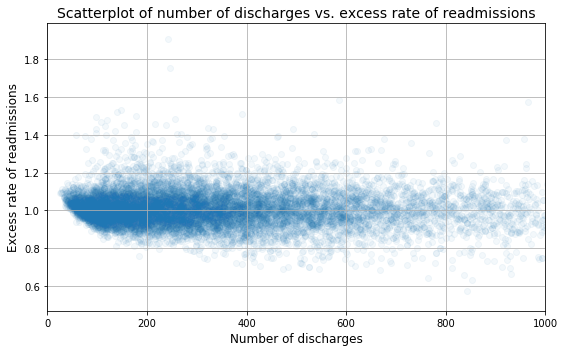

We do see greater variance among observations as the number of discharges increases between 0 and 1000.  It appears also as if as discharges increases, as pointed to earlier, a declining percentage observes ratios less than 1.0.


In [12]:
print('The above scatterplot is useful in displaying a generally downward trend in excess readmission with respect to \
the number of discharges.  However, the heavy concentration of discharges between 0 and 1000 obscures the ability to \
adequately display a trend within this range.  We can again display this scatterplot while augmenting this area in \
order to unearth any trends.')

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.05)

ax.set_xlim([0, 1000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()
plt.show()

print('We do see greater variance among observations as the number of discharges increases between 0 and 1000.  It appears \
also as if as discharges increases, as pointed to earlier, a declining percentage observes ratios less than 1.0.')